<a href="https://colab.research.google.com/github/dear-elia/dear-elia/blob/main/dysarthria_research_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import tensorflow as tf
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,minmax_scale,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss, confusion_matrix,ConfusionMatrixDisplay
import IPython.display as ipd


In [126]:
data = pd.read_csv("torgo_data/data.csv")
data.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...


In [127]:
data["filename"] = data["filename"]


In [128]:
data.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...


In [131]:
def waveform(file,is_dysarthria,gender):
    x , sr = librosa.load(file)
    plt.figure(figsize=(20, 5))
    plt.title("Waveplot of " +is_dysarthria+' ' +gender )
    librosa.display.waveshow(x, sr=sr)
    plt.show()

def Spectogram_of_log(file,is_dysarthria,gender):
    x, sr = librosa.load(file)

    plt.figure(figsize=(20, 5))
    plt.title("Specshow of " +is_dysarthria+' ' +gender )
    X = librosa.stft(x)

    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb,sr = sr, x_axis="time",y_axis = "log")
    plt.show()

def Zero_crossing_rate(file,is_dysarthria,gender):
    x, sr = librosa.load(file)

    zero_crossings = librosa.zero_crossings(x)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(20, 5))
    plt.title("Zero Crossing Rate of "  +is_dysarthria+' ' +gender )
    zcrs = librosa.feature.zero_crossing_rate(x)
    plt.plot(zcrs[0])
    plt.show()
def Spectral_centroid(file,is_dysarthria,gender):
    x, sr = librosa.load(file)
    plt.figure(figsize=(20, 5))
    plt.title("Spectral Centroids of " +is_dysarthria+ ' '+gender )
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.show()

def Spectral_rolloff(file,is_dysarthria,gender):
    x, sr = librosa.load(file)
    plt.figure(figsize=(20, 5))
    plt.title("Spectral Rolloff of " +is_dysarthria+ ' '+gender )
    spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.01)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_rolloff), color='r')
    plt.show()

def mfcc(file,is_dysarthria,gender):
    x,  sr = librosa.load(file)
    plt.figure(figsize=(20, 6))
    plt.title("MFCC Spectral of "  +is_dysarthria+' ' +gender )
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.show()

def mel_Spectogram(file,is_dysarthria,gender):
    x,  sr = librosa.load(file)
    plt.figure(figsize=(20, 6))
    plt.title("Mel Spectrogram of "  +is_dysarthria+ ' '+gender )
    mel_spec = librosa.feature.melspectrogram(y=x, sr=sr)
    librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
    plt.show()

def get_feature_plot(file,is_dysarthria,gender):
    waveform(file,is_dysarthria,gender)
    Spectogram_of_log(file,is_dysarthria,gender)
    Zero_crossing_rate(file,is_dysarthria,gender)
    #Spectral_centroid(file,is_dysarthria,gender)
    #Spectral_rolloff(file,is_dysarthria,gender)
    #mel_Spectogram(file,is_dysarthria,gender)
    mfcc(file,is_dysarthria,gender)

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

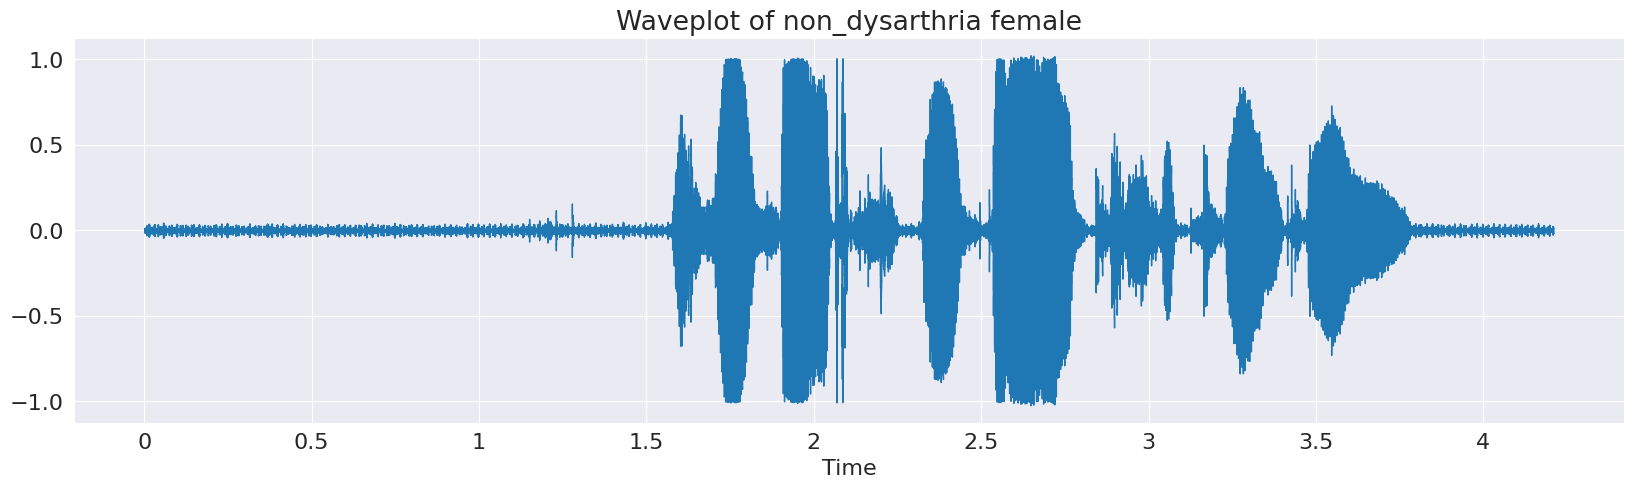

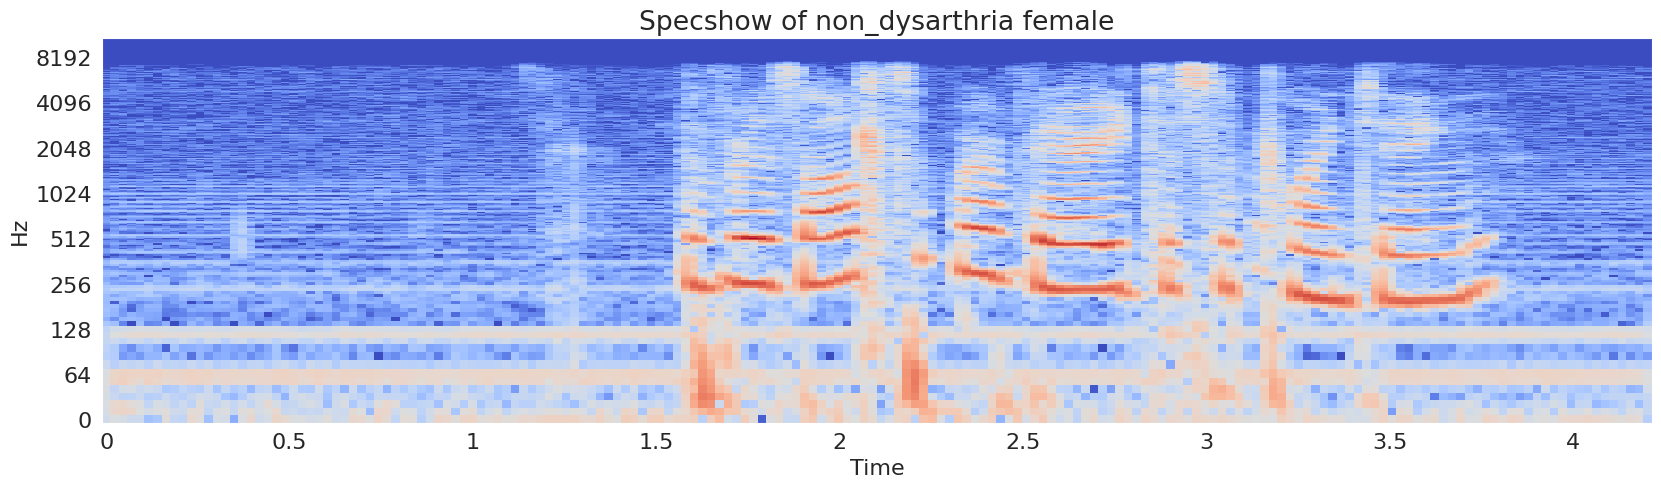

Sum of zero crossing  8748


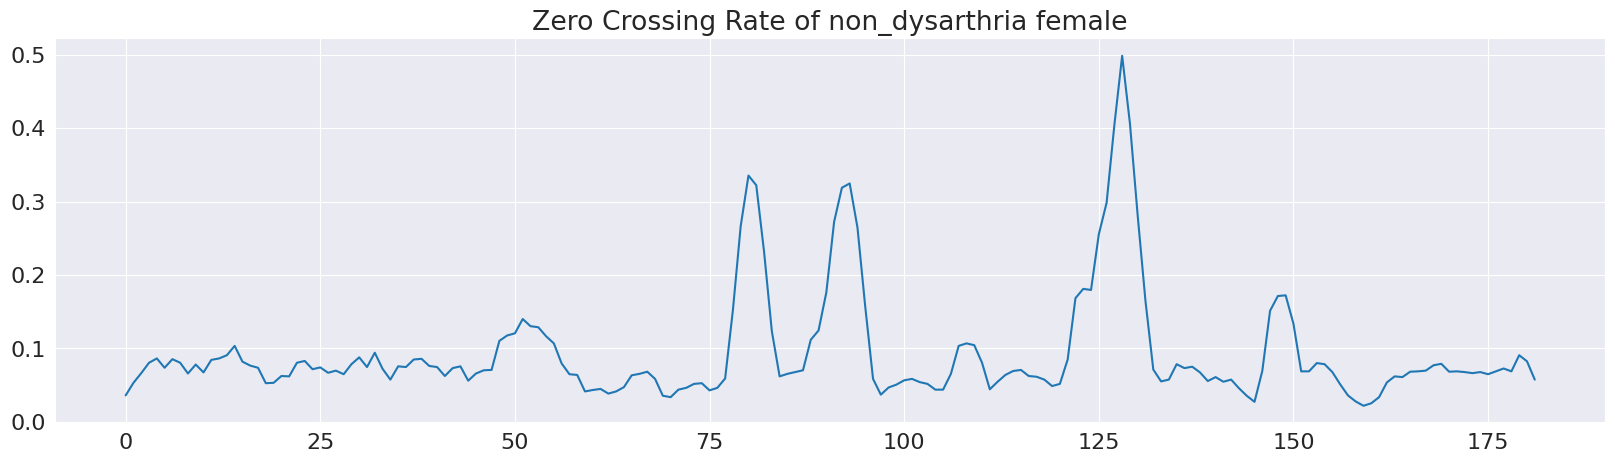

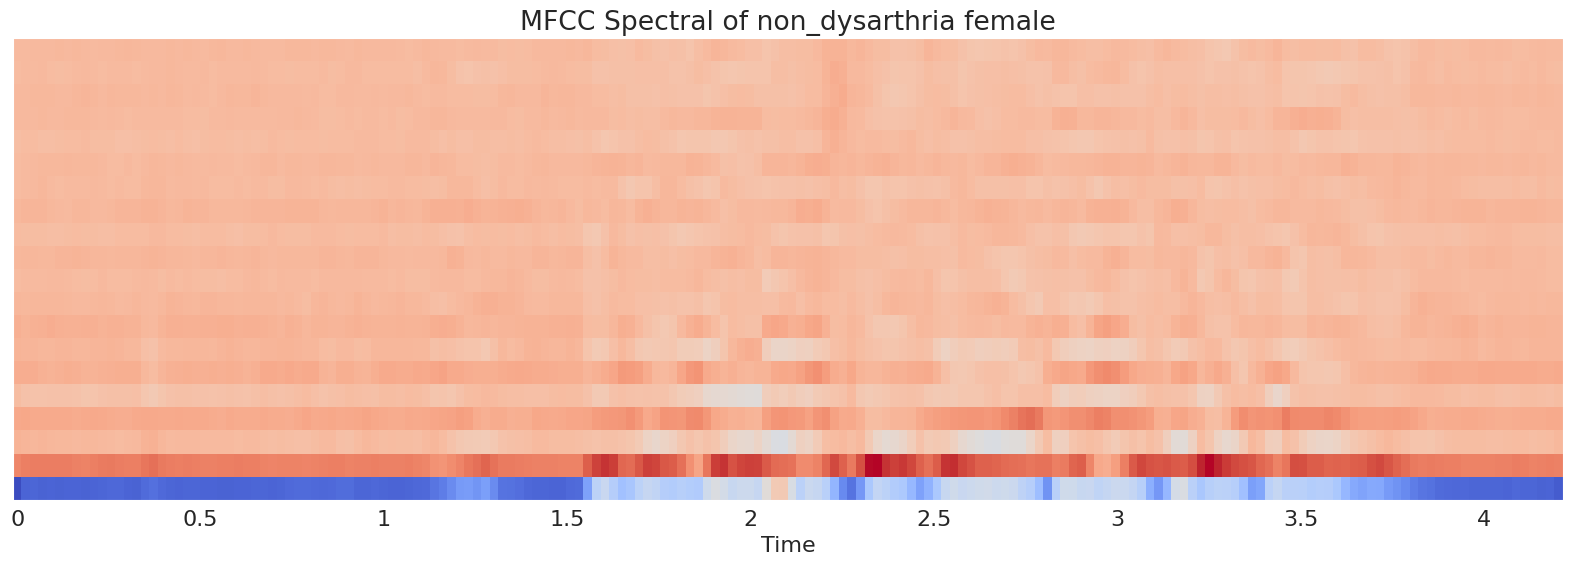

In [132]:
#Feature Plots for Non dysarthria Female
sample = data[(data["is_dysarthria"] == "non_dysarthria") & (data["gender"] == "female")]
get_feature_plot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample.filename.values[0])

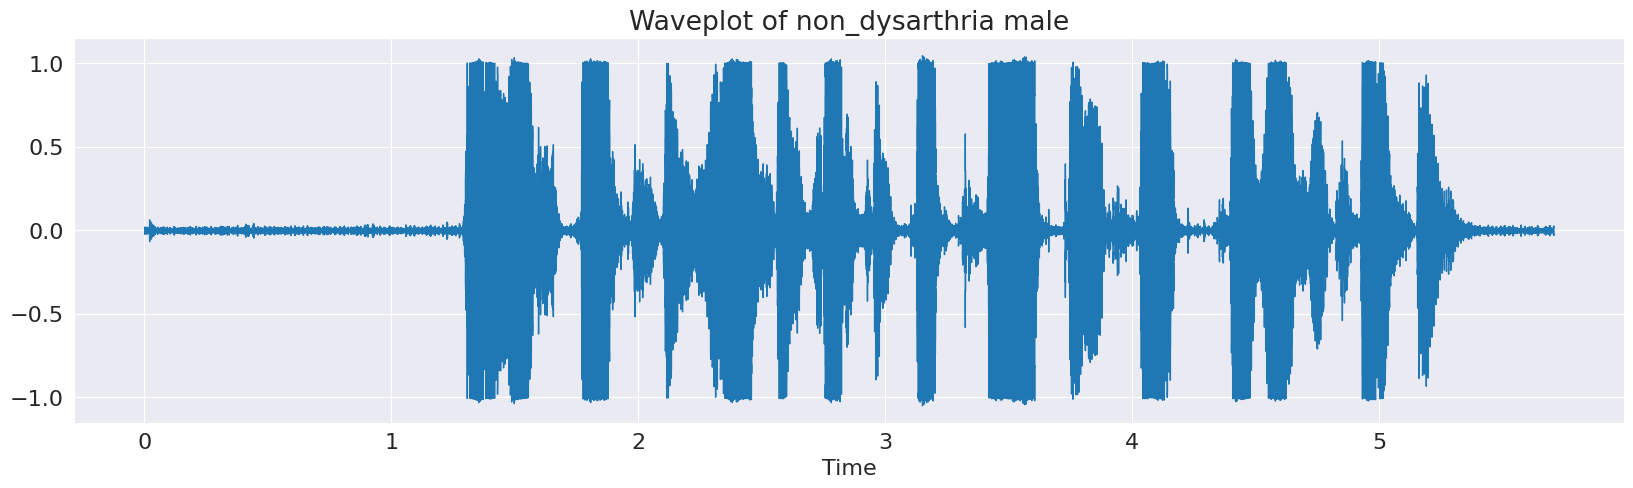

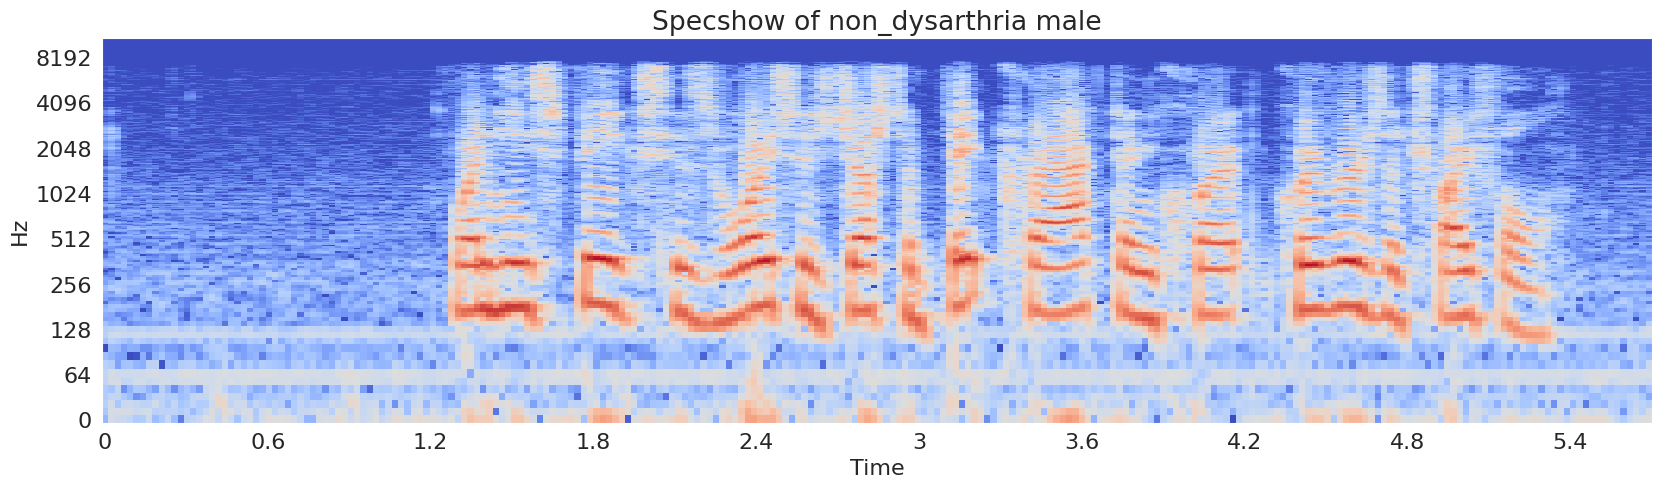

Sum of zero crossing  11700


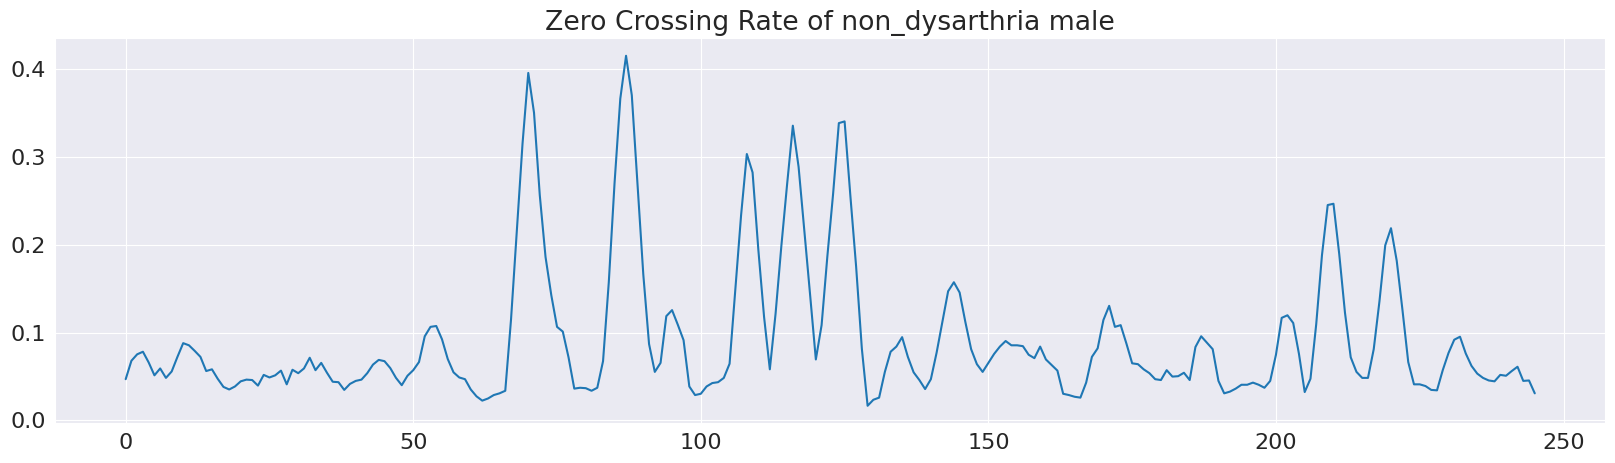

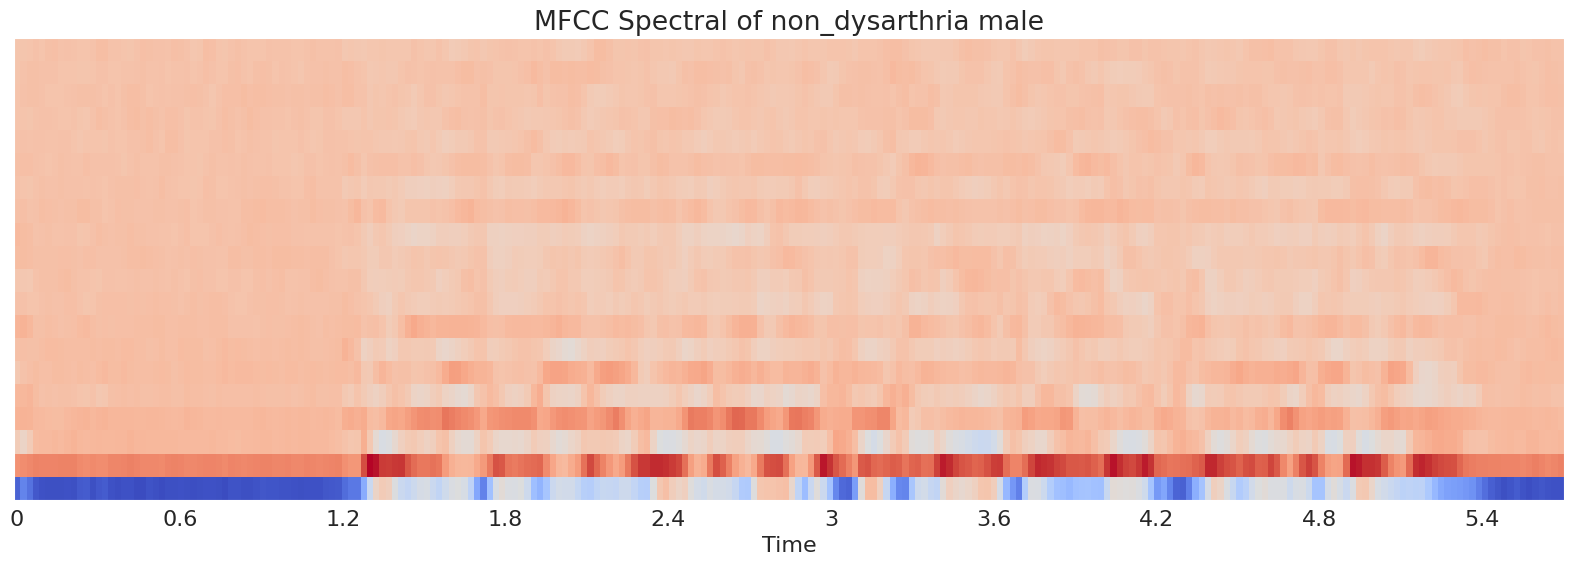

In [133]:
#Feature Plots for Non Dysarthria Male
sample = data[(data["is_dysarthria"] == "non_dysarthria") & (data["gender"] == "male")]
get_feature_plot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample.filename.values[0])

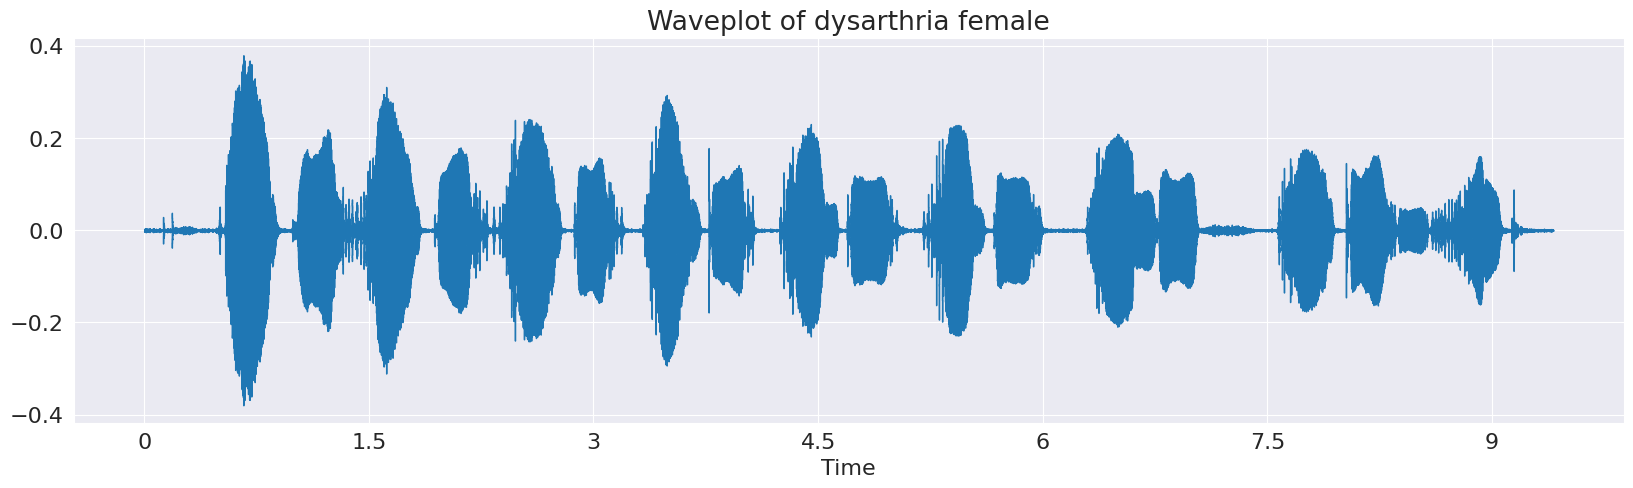

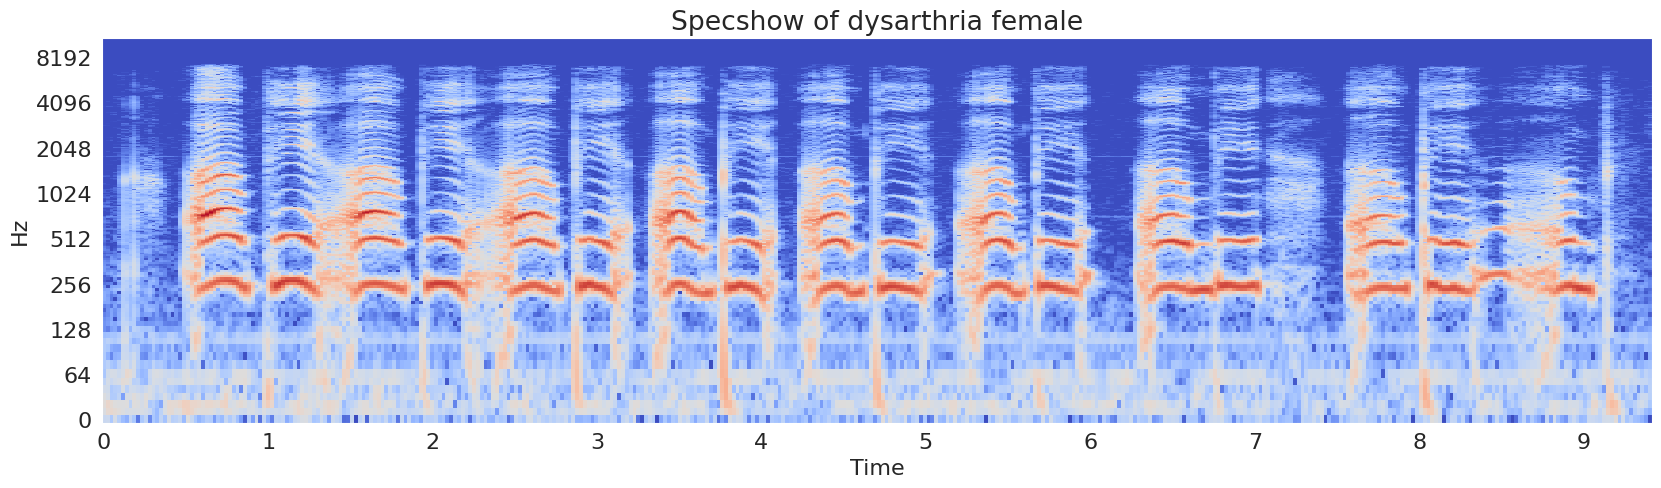

Sum of zero crossing  9225


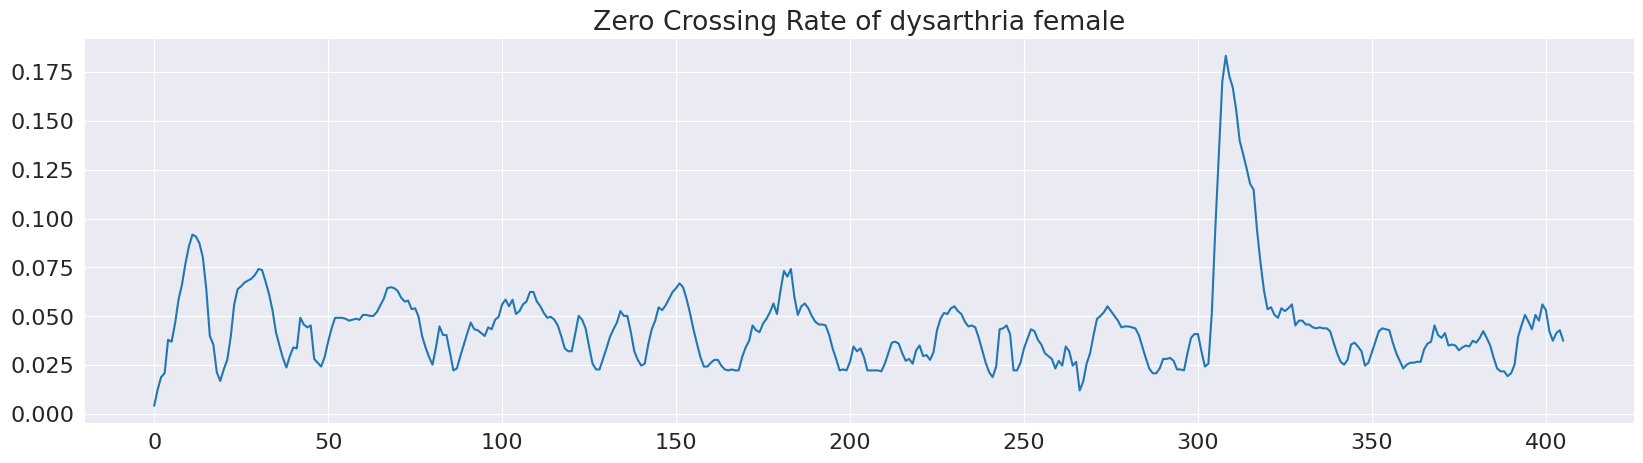

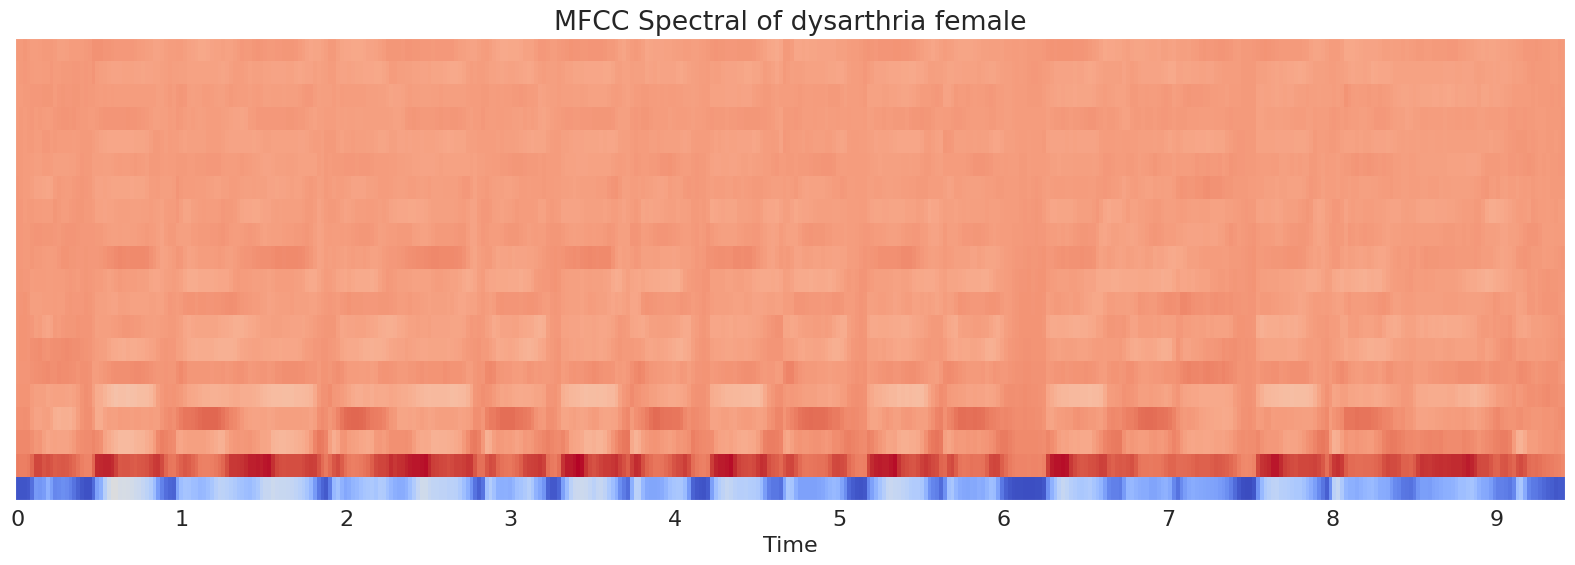

In [134]:
#Feature Plots for Dysarthria Female
sample = data[(data["is_dysarthria"] == "dysarthria") & (data["gender"] == "female")]
get_feature_plot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample.filename.values[0])

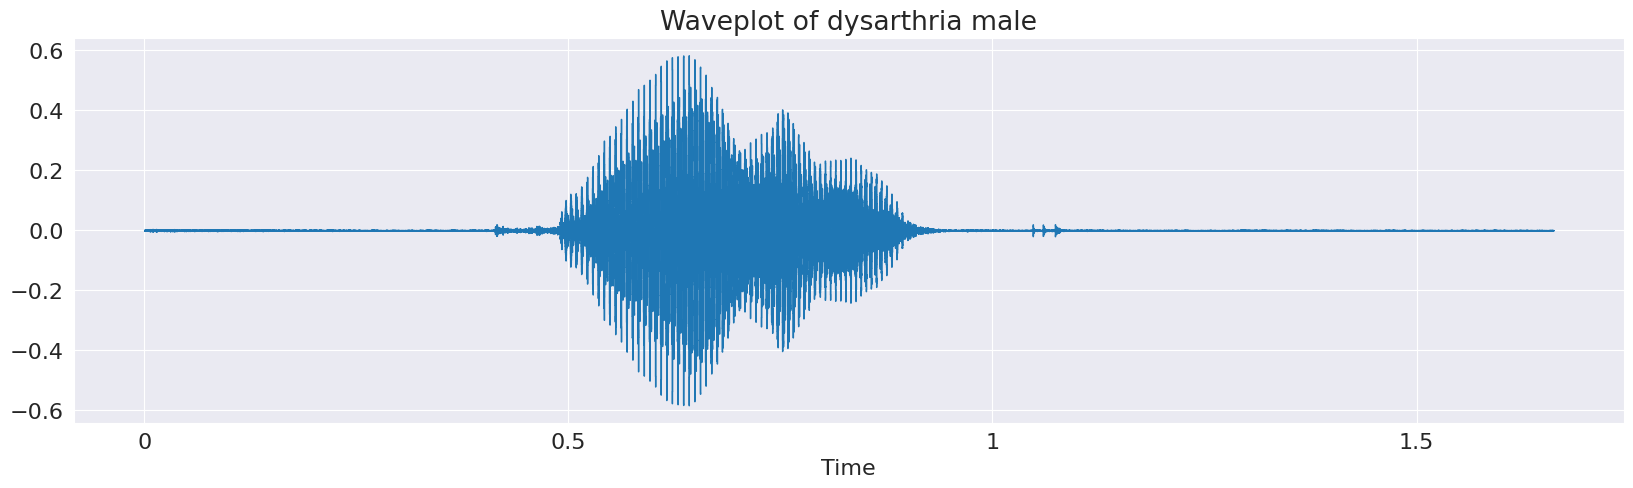

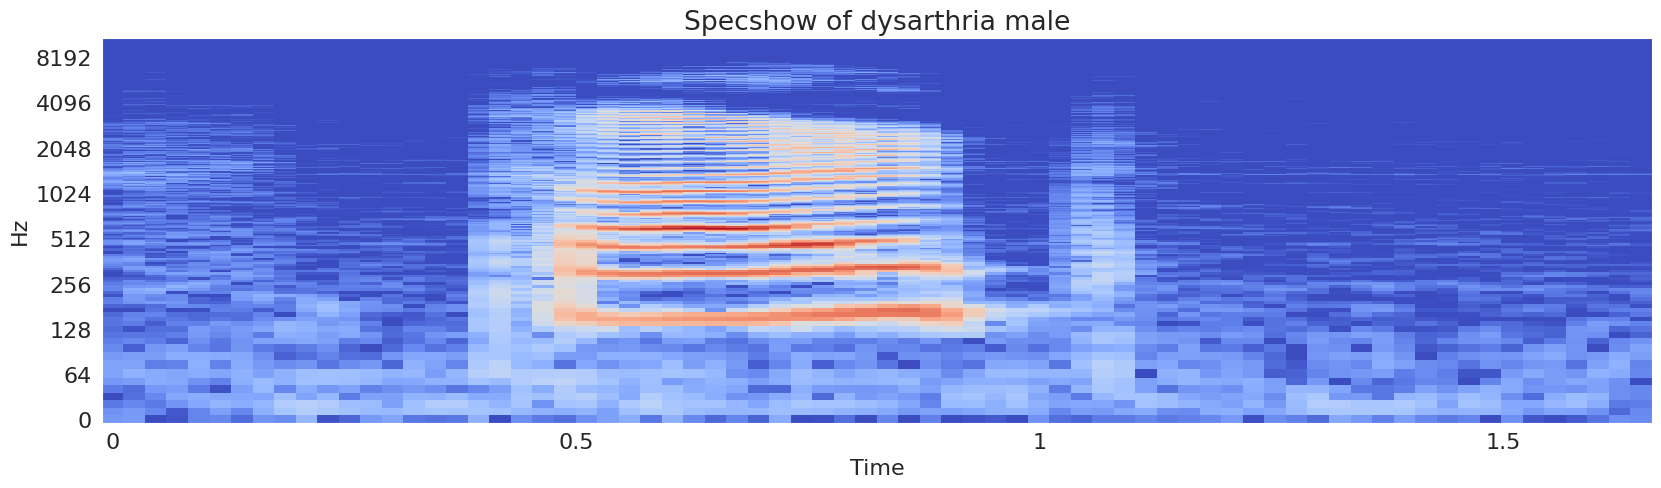

Sum of zero crossing  3219


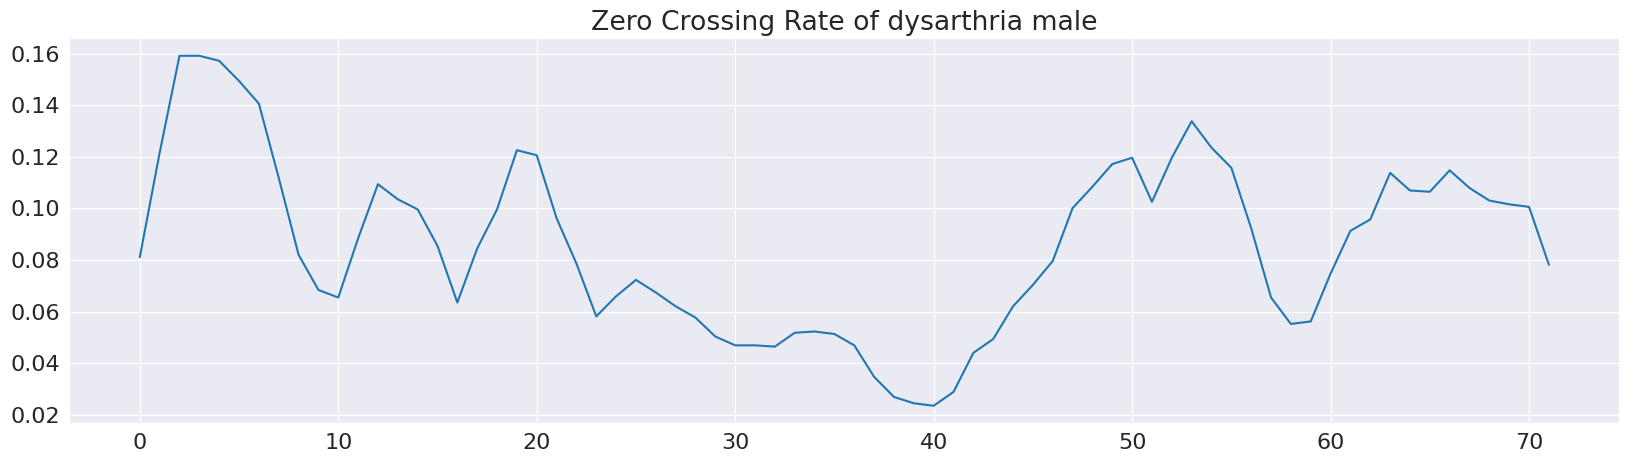

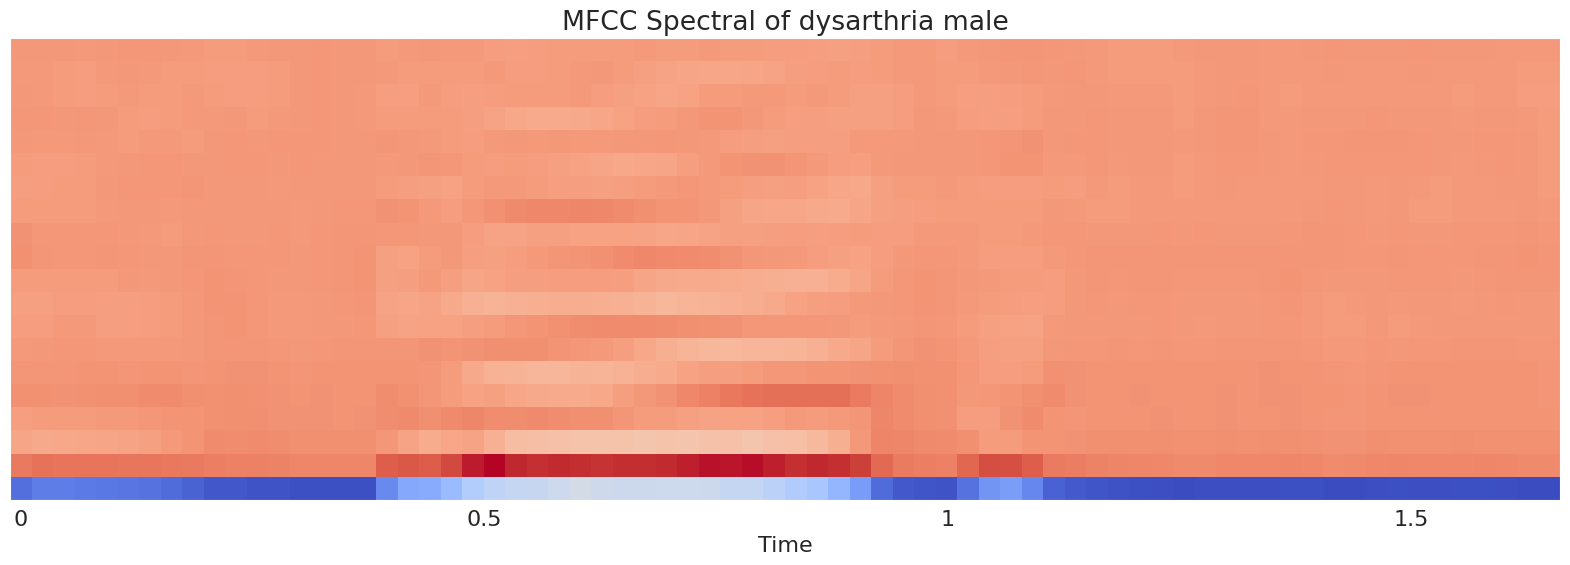

In [135]:
#Feature Plots for Dysarthria Male

sample = data[(data["is_dysarthria"] == "dysarthria") & (data["gender"] == "male")]
get_feature_plot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample.filename.values[0])

In [136]:
#Function to create MFCC features
def create_mfcc_features(path):
    mfccs = []
    try:
        x , sr = librosa.load(path)
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        mfccs = np.mean(mfccs.T,axis=0)
    except:
        print('Error reading audio')
    return mfccs

In [137]:
#Extracting mfcc features from data
%%time
X_df = pd.DataFrame(data['filename'].apply(lambda x: create_mfcc_features(x)).tolist())
X_df.head()

Error reading audio
CPU times: user 37.3 s, sys: 26.6 s, total: 1min 3s
Wall time: 38.5 s


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-221.788269,101.259232,-16.548132,38.492065,-13.595653,20.772556,-5.536349,10.410690,1.962461,-0.799048,...,1.363241,0.962193,0.744855,1.058080,0.388451,0.081758,0.546172,0.594357,0.170033,-0.219215
1,-299.520081,109.872574,-17.097267,38.854969,-16.881130,22.959133,1.824228,18.724186,3.448541,4.455821,...,1.329316,1.105589,1.056284,1.252576,0.027333,-1.368948,-0.037859,0.020661,-0.082124,-0.744831
2,-302.950043,112.048477,-23.679882,44.887421,-22.434727,26.299335,0.811477,18.210291,4.344697,4.912156,...,0.993410,0.844332,0.530004,1.018391,0.055385,-1.472088,0.295324,0.191228,-0.224301,-0.582725
3,-210.861603,116.504486,-35.046497,37.670425,-27.112514,25.593725,-7.511986,13.140750,-0.587347,4.138087,...,1.068848,0.630752,0.898457,0.721398,0.174576,-0.090706,0.001523,0.360464,-0.075449,-0.259715
4,-280.227203,104.505035,-17.209877,45.064884,-15.542122,28.115065,-3.449209,16.841436,4.573242,1.738296,...,1.486205,1.596206,0.970084,0.732015,0.547593,-0.152664,0.131893,-0.288228,-0.468570,-0.461726


In [139]:
X = X_df
y = data['is_dysarthria']
y = y.replace({"non_dysarthria": 0,"dysarthria":1}) ## 0 represents Non dysarthria and 1 represents dysarthria

data1 = pd.DataFrame(X_df,columns=range(0,128))
data1["class"] =y

data1

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,class
0,-221.788269,101.259232,-16.548132,38.492065,-13.595653,20.772556,-5.536349,10.410690,1.962461,-0.799048,...,0.962193,0.744855,1.058080,0.388451,0.081758,0.546172,0.594357,0.170033,-0.219215,0
1,-299.520081,109.872574,-17.097267,38.854969,-16.881130,22.959133,1.824228,18.724186,3.448541,4.455821,...,1.105589,1.056284,1.252576,0.027333,-1.368948,-0.037859,0.020661,-0.082124,-0.744831,0
2,-302.950043,112.048477,-23.679882,44.887421,-22.434727,26.299335,0.811477,18.210291,4.344697,4.912156,...,0.844332,0.530004,1.018391,0.055385,-1.472088,0.295324,0.191228,-0.224301,-0.582725,0
3,-210.861603,116.504486,-35.046497,37.670425,-27.112514,25.593725,-7.511986,13.140750,-0.587347,4.138087,...,0.630752,0.898457,0.721398,0.174576,-0.090706,0.001523,0.360464,-0.075449,-0.259715,0
4,-280.227203,104.505035,-17.209877,45.064884,-15.542122,28.115065,-3.449209,16.841436,4.573242,1.738296,...,1.596206,0.970084,0.732015,0.547593,-0.152664,0.131893,-0.288228,-0.468570,-0.461726,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-304.231995,115.359306,-0.794746,26.543352,-0.682190,13.183387,2.389221,4.290236,-1.372811,-2.624718,...,0.473923,0.103740,0.311737,0.015566,-0.055351,0.193023,0.332826,0.014455,-0.221991,1
1996,-457.822144,110.087799,22.221983,-0.056086,-11.181323,3.190089,-4.499060,4.474746,5.809545,-1.913331,...,0.622933,0.508349,0.398737,0.455839,0.348571,0.286893,0.150862,-0.052999,0.001199,1
1997,-371.546875,116.846909,5.667272,22.488144,8.221014,7.740132,8.989120,9.996635,4.383992,3.590931,...,0.240280,-0.009779,-0.018253,-0.014393,-0.263360,0.556257,0.749682,-0.283888,-0.398581,1
1998,-302.500702,112.511192,-4.506541,32.498363,-1.519380,4.109807,4.611475,9.744306,-2.962905,-3.497744,...,0.146675,-0.200982,0.388719,0.160434,-0.383473,0.417755,1.042827,-0.082762,-0.111990,1


In [140]:
#### Checking for na values
data1.isna().sum().sum()
data1 = data1.dropna()

In [141]:
data1["class"].value_counts()

,count
class,
0,1000
1,999


In [142]:
X = data1.iloc[:,:-1]
y = data1.iloc[:,-1:]

In [143]:
#Train Test split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.20,stratify = y)

In [144]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_val_scale = scaler.transform(x_val)

In [145]:
## Reshaping the data so that it can be given as input to CNN model
x_train = x_train_scale.reshape(x_train.shape[0], 16, 8, 1)
x_val = x_val_scale.reshape(x_val.shape[0], 16, 8, 1)

In [146]:
#CNN model creation
tf.keras.backend.clear_session()
from tensorflow.keras import regularizers
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 8, 16)           │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 4, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,561 (17.82 KB)

 Trainable params: 4,561 (17.82 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [150]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=100,validation_data=(x_val,y_val),
                    callbacks=[callback])

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6618 - loss: 0.6254 - val_accuracy: 0.7775 - val_loss: 0.4535
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7971 - loss: 0.4271 - val_accuracy: 0.8925 - val_loss: 0.3336
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8949 - loss: 0.2981 - val_accuracy: 0.9400 - val_loss: 0.2337
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9498 - loss: 0.1898 - val_accuracy: 0.9500 - val_loss: 0.1889
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9618 - loss: 0.1340 - val_accuracy: 0.9575 - val_loss: 0.1412
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9785 - loss: 0.0984 - val_accuracy: 0.9525 - val_loss: 0.1521
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9794 - loss: 0.0800 - val_accuracy: 0.9750 - val_loss: 0.1042
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9892 - loss: 0.0553 - val_accuracy: 0.9775 - 

In [152]:
print(len(history.history['accuracy']))  # Training accuracy
print(len(history.history['val_accuracy']))  # Validation accuracy

15
15


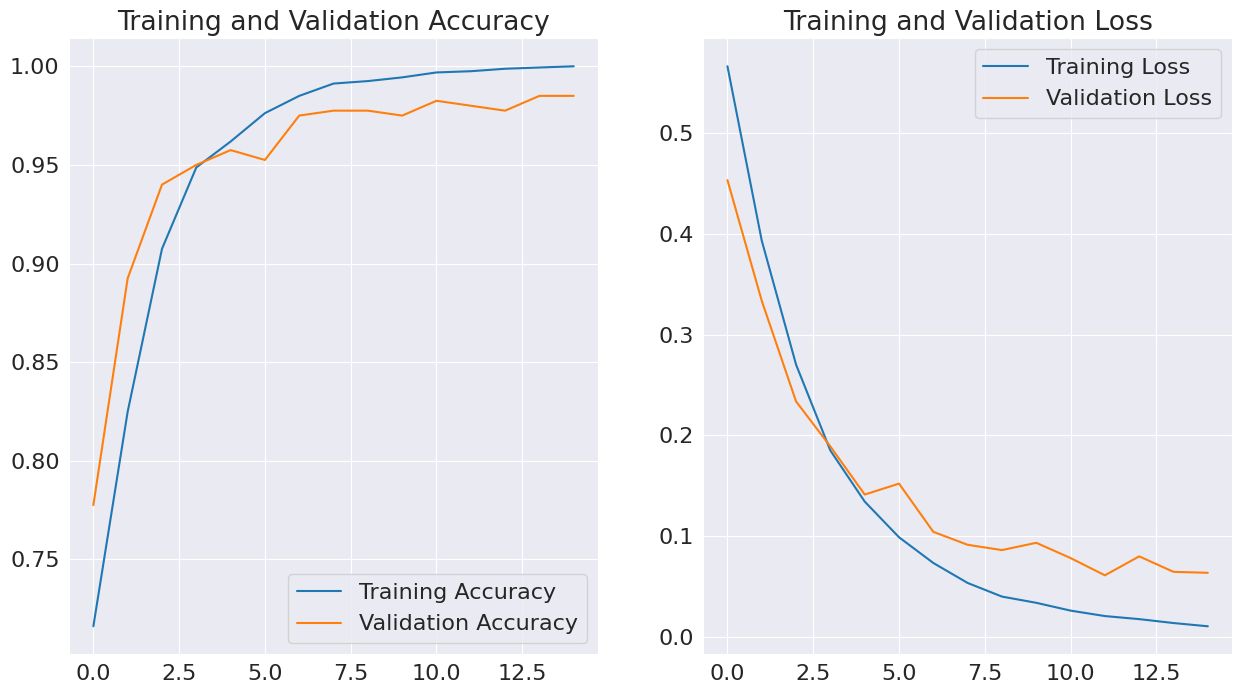

In [153]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)


plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#If traning accuracy is increasing while validation is decreasing, the model
#is memorizing the training data too well and might not perform as well on new, unseen data.
#after all performs well
#Both training and validation loss generally decrease over the initial epochs, indicating that the model is learning from the data and making better predictions.
#As the model learns, it makes fewer errors, leading to a lower loss value.

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
training accuracy =  100.0


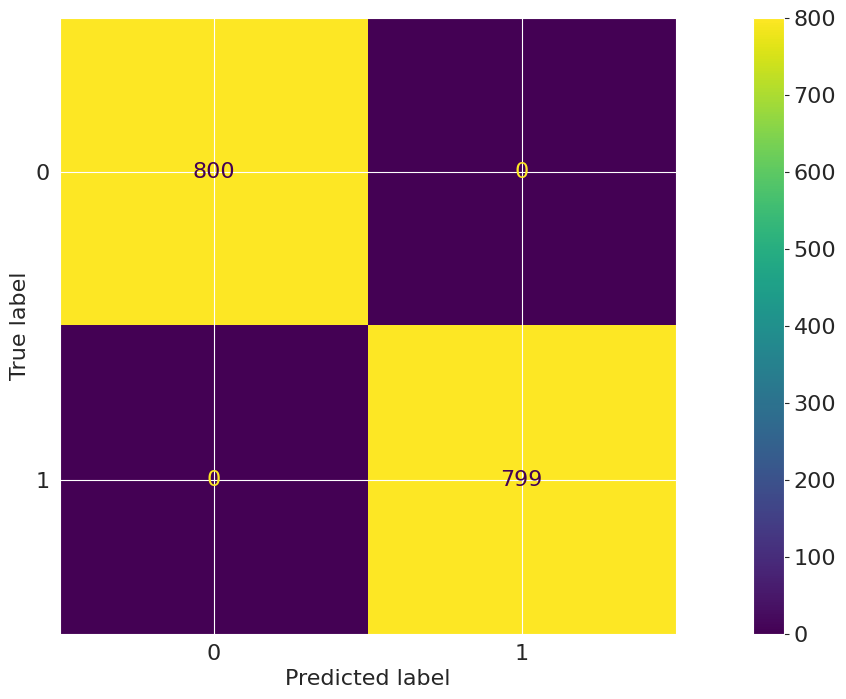

testing accuracy =  98.5


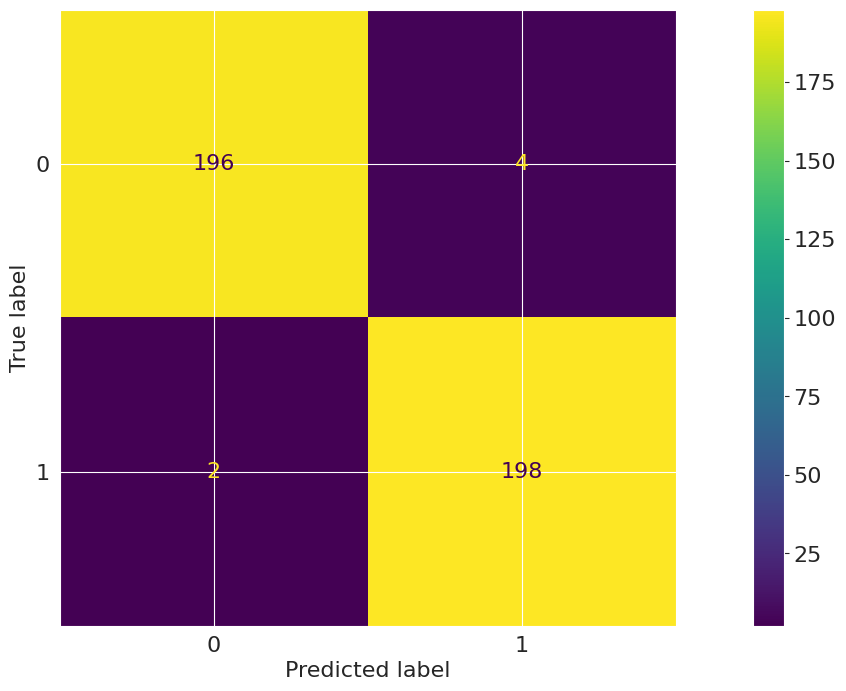

In [154]:
#Model Evaluation
## prediction
y_train_pred = np.where(model.predict(x_train) > 0.5, 1,0)
y_test_pred = np.where(model.predict(x_val) > 0.5, 1,0)

## Accuracy and Confusion Matrix
## training
print("training accuracy = ",accuracy_score(y_train,y_train_pred)*100)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()
## testing
print("testing accuracy = ",accuracy_score(y_val,y_test_pred)*100)
ConfusionMatrixDisplay.from_predictions(y_val,y_test_pred)
plt.show()

In [155]:
from sklearn.metrics import roc_auc_score,classification_report
print("train Roc_auc score = ", roc_auc_score(y_train,y_train_pred))
print("test Roc_auc score = ", roc_auc_score(y_val,y_test_pred))

train Roc_auc score =  1.0
test Roc_auc score =  0.985


In [156]:
print("train classification report:\n ", classification_report(y_train,y_train_pred))
print("test classification report:\n\n ", classification_report(y_val,y_test_pred))

train classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599

test classification report:

                precision    recall  f1-score   support

           0       0.99      0.98      0.98       200
           1       0.98      0.99      0.99       200

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



In [158]:
#Classification
#Load and Preprocess the Audio:
def preprocess_audio(file_path):
    x, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
    mfccs = np.mean(mfccs.T, axis=0)
    mfccs = scaler.transform(mfccs.reshape(1, -1))  # Reshape and scale
    mfccs = mfccs.reshape(1, 16, 8, 1)  # Reshape for CNN
    return mfccs

In [161]:
#Make Predictions
def predict_speech_type(file_path, model):
    audio_features = preprocess_audio(file_path)
    prediction = model.predict(audio_features)[0][0]

    if prediction > 0.5:
        speech_type = "Dysarthric"
    else:
        speech_type = "Normal"

    return speech_type

In [162]:
file_path = "torgo_data/dysarthria_female/F01_Session1_0124.wav"  # Replace with the actual path
speech_type = predict_speech_type(file_path, model)
print(f"The audio is classified as: {speech_type}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The audio is classified as: Dysarthric


In [164]:
file_path = "torgo_data/non_dysarthria_male/MC01_Session2_0089.wav"  # Replace with the actual path
speech_type = predict_speech_type(file_path, model)
print(f"The audio is classified as: {speech_type}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The audio is classified as: Normal
